In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math


In [12]:
# to get  db from csv files
bike=pd.read_csv(r"C:\Users\annaa\OneDrive\Desktop\LightHouseLabs Data Immerse\Project 2 updated\SQL\Statistical-Modelling-Project\data\citi_bike.csv")
fourSqr=pd.read_csv(r"C:\Users\annaa\OneDrive\Desktop\LightHouseLabs Data Immerse\Project 2 updated\SQL\Statistical-Modelling-Project\data\FourSqr_orig.csv")
yelp=pd.read_csv(r"C:\Users\annaa\OneDrive\Desktop\LightHouseLabs Data Immerse\Project 2 updated\SQL\Statistical-Modelling-Project\data\Yelp_orig.csv")


#to make dataframes
bike_df=pd.DataFrame(bike)
fourSqr_df=pd.DataFrame(fourSqr)
yelp_df=pd.DataFrame(yelp)

bike_df.head(5)

,empty_slots,free_bikes,total_slots,name,latitude,longitude,difference_in_m_from_center
0,10,30,40,7035 - MARSEILLE / UNIVERSITÉ,45.750945,4.839270,316.708599
1,1,20,21,7024 - BANCEL / CHEVREUL,45.748504,4.840505,620.360331
2,1,9,10,7008 - JEAN JAURÈS / GUILLOTIÈRE,45.752510,4.846278,925.405768
3,3,19,22,2013 - CÉLESTINS,45.759932,4.832111,967.999842
4,0,15,15,7016 - PLACE SAINT LOUIS,45.748925,4.847714,1191.854823


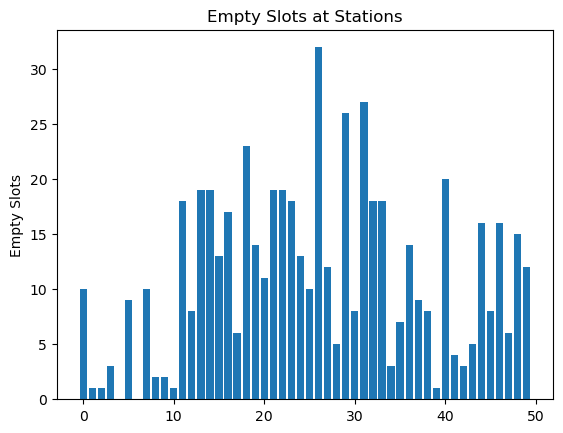

In [20]:

# Create a bar chart. Used range instead of names of the stations
plt.bar(range(len(bike_df["name"])), bike_df["empty_slots"])

# Set the y-axis label
plt.ylabel("Empty Slots")

# Set the title of the chart
plt.title("Empty Slots at Stations")


# Display the chart "empty slots" per station "name"
plt.show()


In [21]:
fourSqr_df.head(5)

,business_name,category_name,distance,rating,latitude,longitude,locality,region,postcode
0,Auberge du Pont de Collonges-Paul Bocuse,French Restaurant,6940,8.1,45.815712,4.847452,Collonges-au-Mont-d'Or,Auvergne-Rhône-Alpes,69660.0
1,La Demeure du Chaos,Art Museum,9366,8.2,45.837487,4.826422,Saint-Romain-au-Mont-d'Or,Auvergne-Rhône-Alpes,69270.0
2,Guy Lassausaie,Fast Food Restaurant,14243,8.0,45.872851,4.770494,Chasselay,Auvergne-Rhône-Alpes,69380.0
3,Zoo de Saint-Martin-la-Plaine,Zoo,30022,8.4,45.549991,4.583793,Saint-Martin-la-Plaine,Auvergne-Rhône-Alpes,42800.0
4,Place Bellecour,Plaza,623,9.1,45.757567,4.832622,Lyon,Auvergne-Rhône-Alpes,69002.0


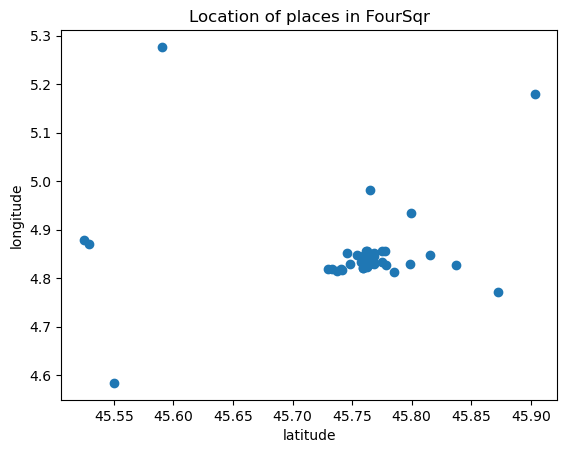

In [26]:
plt.scatter(fourSqr_df["latitude"], fourSqr_df["longitude"])

# Add labels and title
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Location of places in FourSqr")


plt.show()

In [27]:
yelp_df.head(5)

,business_name,title,distance,rating,review_count,latitude,longitude,zip_code
0,Passerelle de l'Homme de la Roche,Landmarks & Historical Buildings,1961.722459,5.0,5,45.767094,4.821881,69005
1,[CYS] 12 : Bon Anniversaire le CYS,Unofficial Yelp Events,2736.298001,5.0,5,45.777795,4.834284,69004
2,CYS #6 : l'édition qui voyage dans le temps,Yelp Events,518.682093,5.0,6,45.752682,4.831460,69002
3,RDV Yelp Officiel Atelier Méthode Douce chez P...,Yelp Events,1233.176168,5.0,7,45.764180,4.833750,69002
4,Maison Gilles Drevet,Butcher,3698.627496,5.0,7,45.769020,4.880170,69100


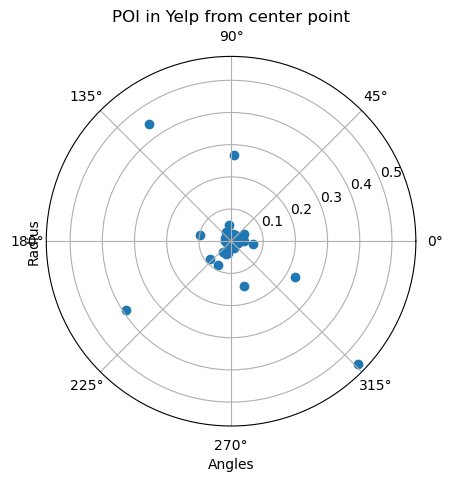

In [48]:


# Center point coordinates
center_x, center_y = 45.7535, 4.8380

# Generate points around the center
num_points = len(yelp_df["latitude"])
radius = 30
#Angles at which the data points will be plotted
#np.linspace() is a NumPy function that generates an array of evenly spaced values.
#In this case, 0 is the starting value of the range, and 2*np.pi is the ending value.
#2*np.pi represents a full circle in radians (equivalent to 360 degrees)
#ps:np.linspace function was Googled
theta = np.linspace(0, 2*np.pi, num_points)

offset_x = yelp_df["latitude"]
offset_y = yelp_df["longitude"]

# Calculate final coordinates
x =  offset_x-center_x
y = offset_y-center_y

# Create polar scatter plot
fig = plt.figure()

#This line creates a subplot with a polar projection within the "fig" figure. 
#The 111 argument indicates that there is only one row, one column, and this subplot is the first one. 
#The projection="polar" argument specifies that the subplot should have a polar coordinate system
#ps.below line was Googled to create plot
ax = fig.add_subplot(111, projection="polar")

#This line creates a scatter plot on the polar axis. 
#The "theta" values represent the angles at which the data points will be plotted around the polar axis. 
#The np.sqrt(x**2 + y**2)calculates the distance from the center for each data point, 
#which determines the radius at which the data points will be plotted (Pythagorean theorem)
ax.scatter(theta,np.sqrt(x**2 + y**2)) 

# Set title and labels
ax.set_title("POI in Yelp from center point")
ax.set_xlabel("Angles")
ax.set_ylabel("Radius")

plt.show()
